### Name:----> Abhishek Kumar
### UnGuided Project:----> IT Job Demand 2030F Full Analysis & Prediction ML Project

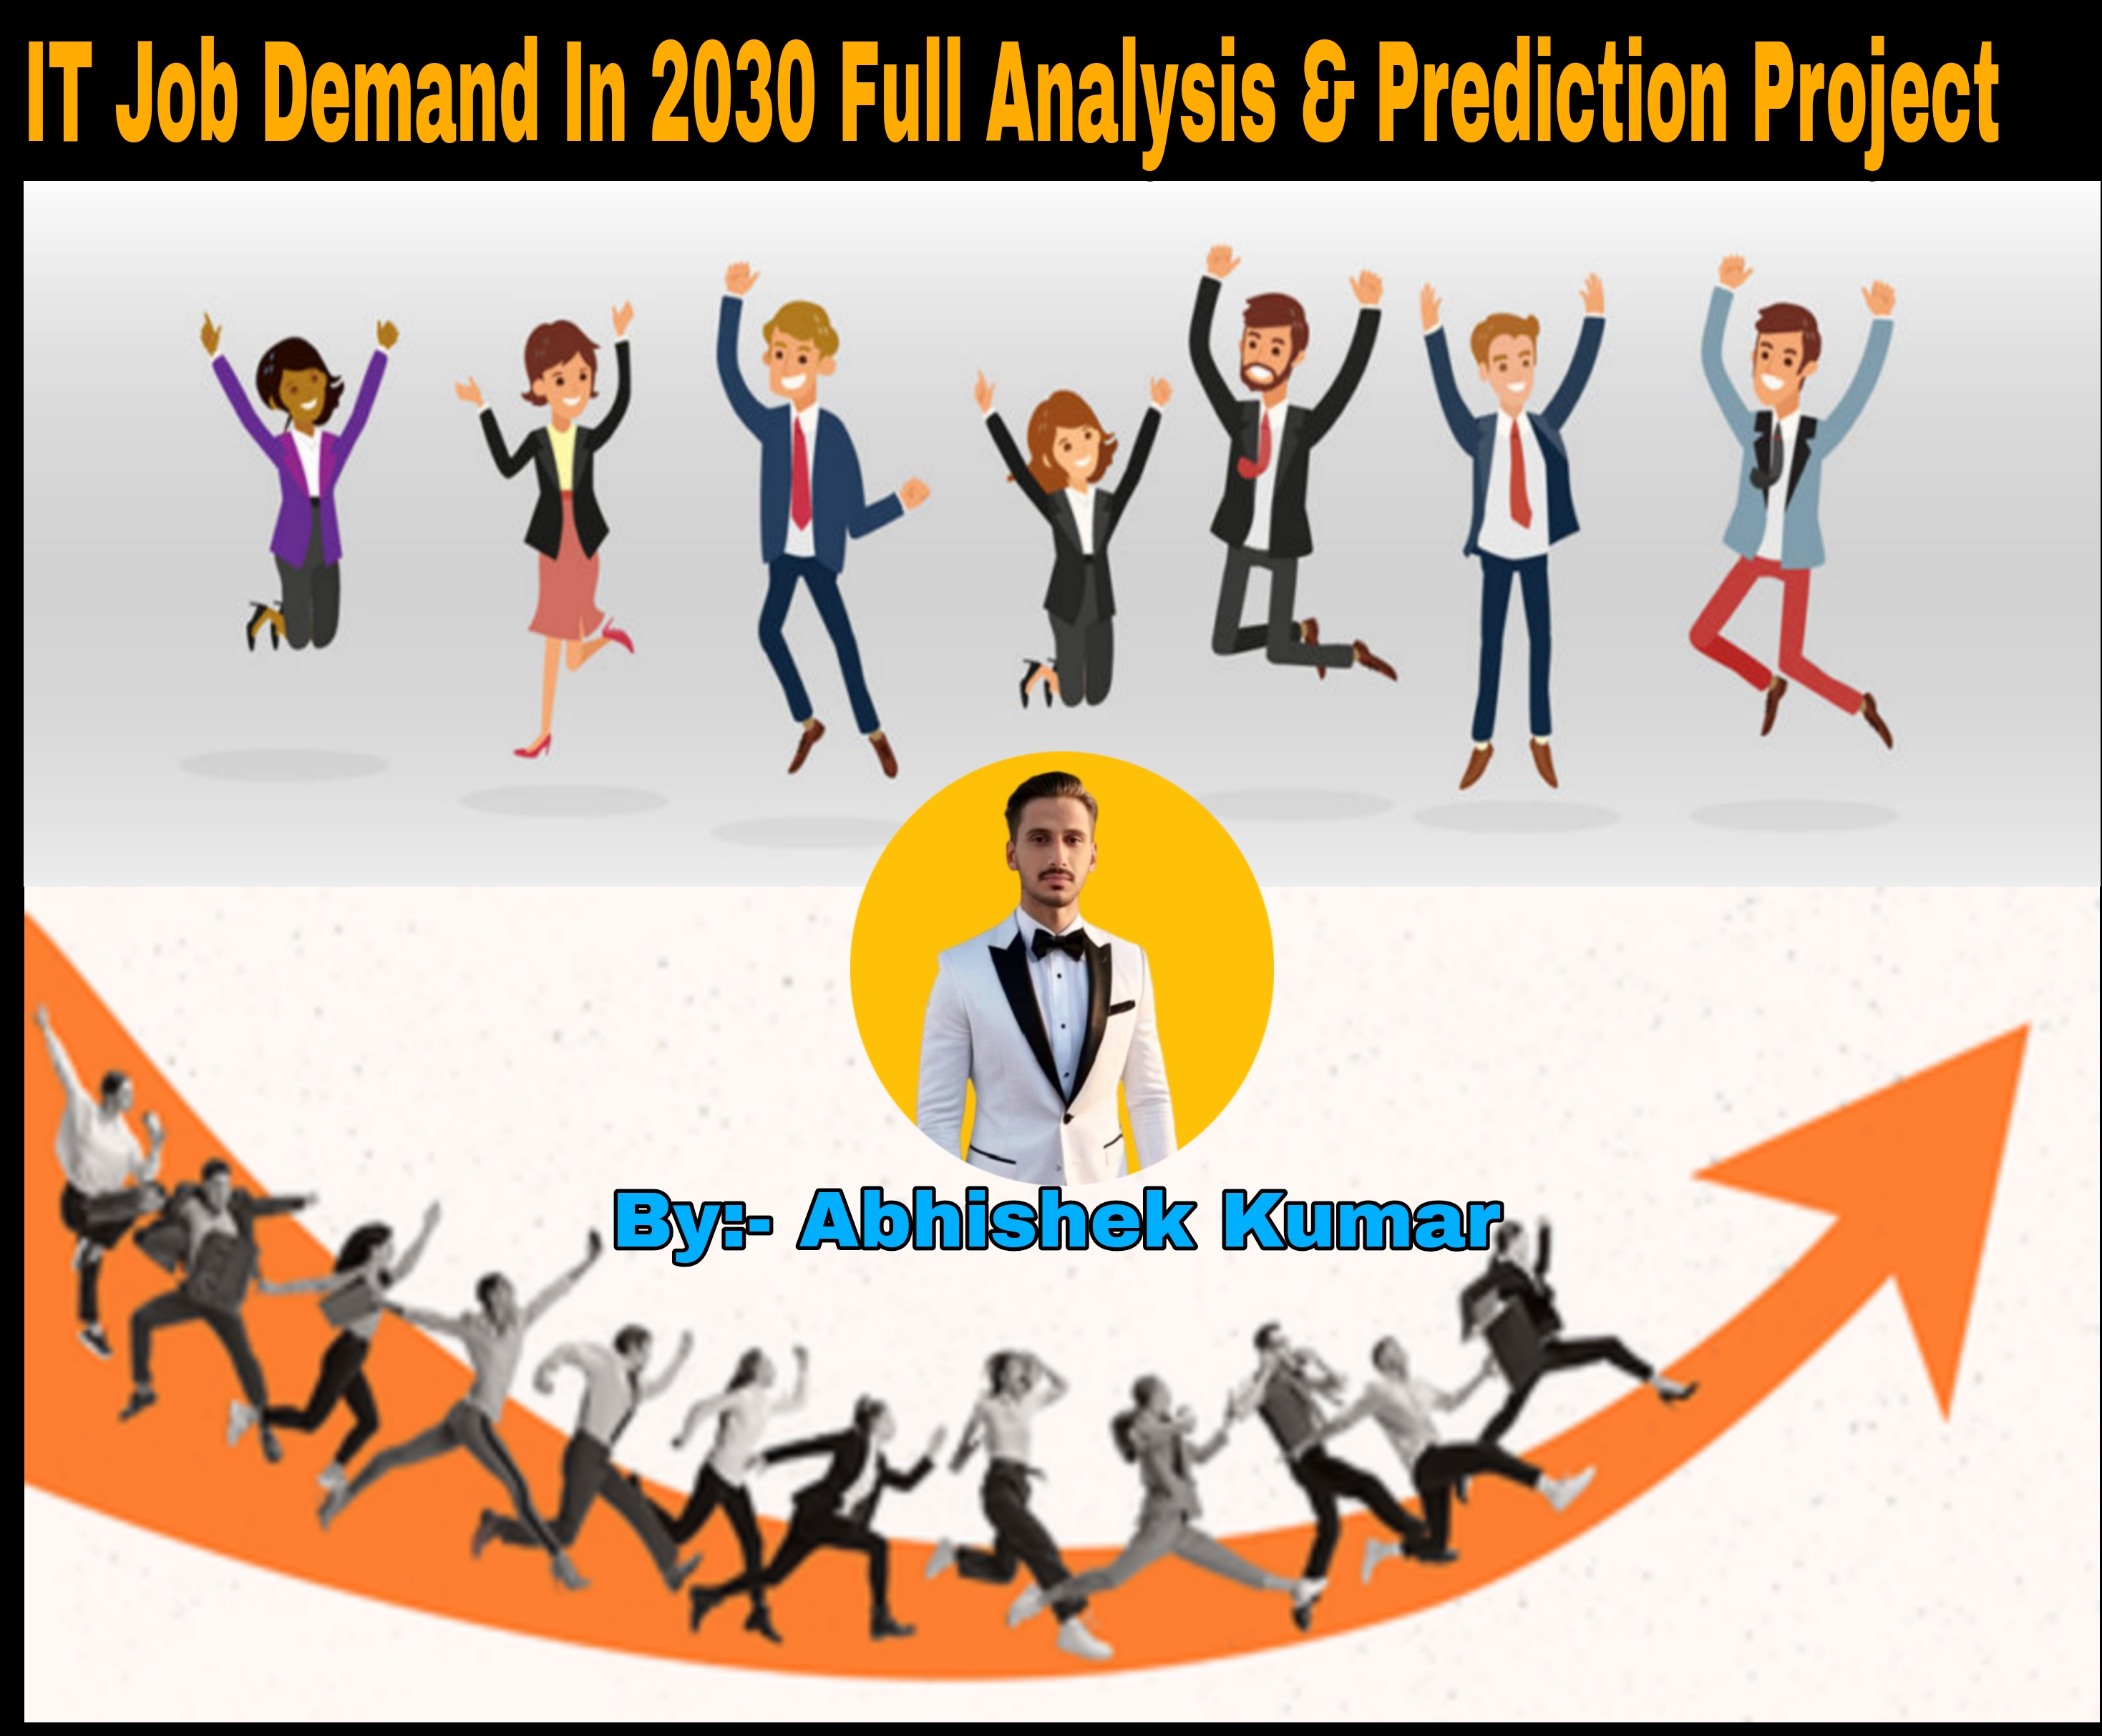

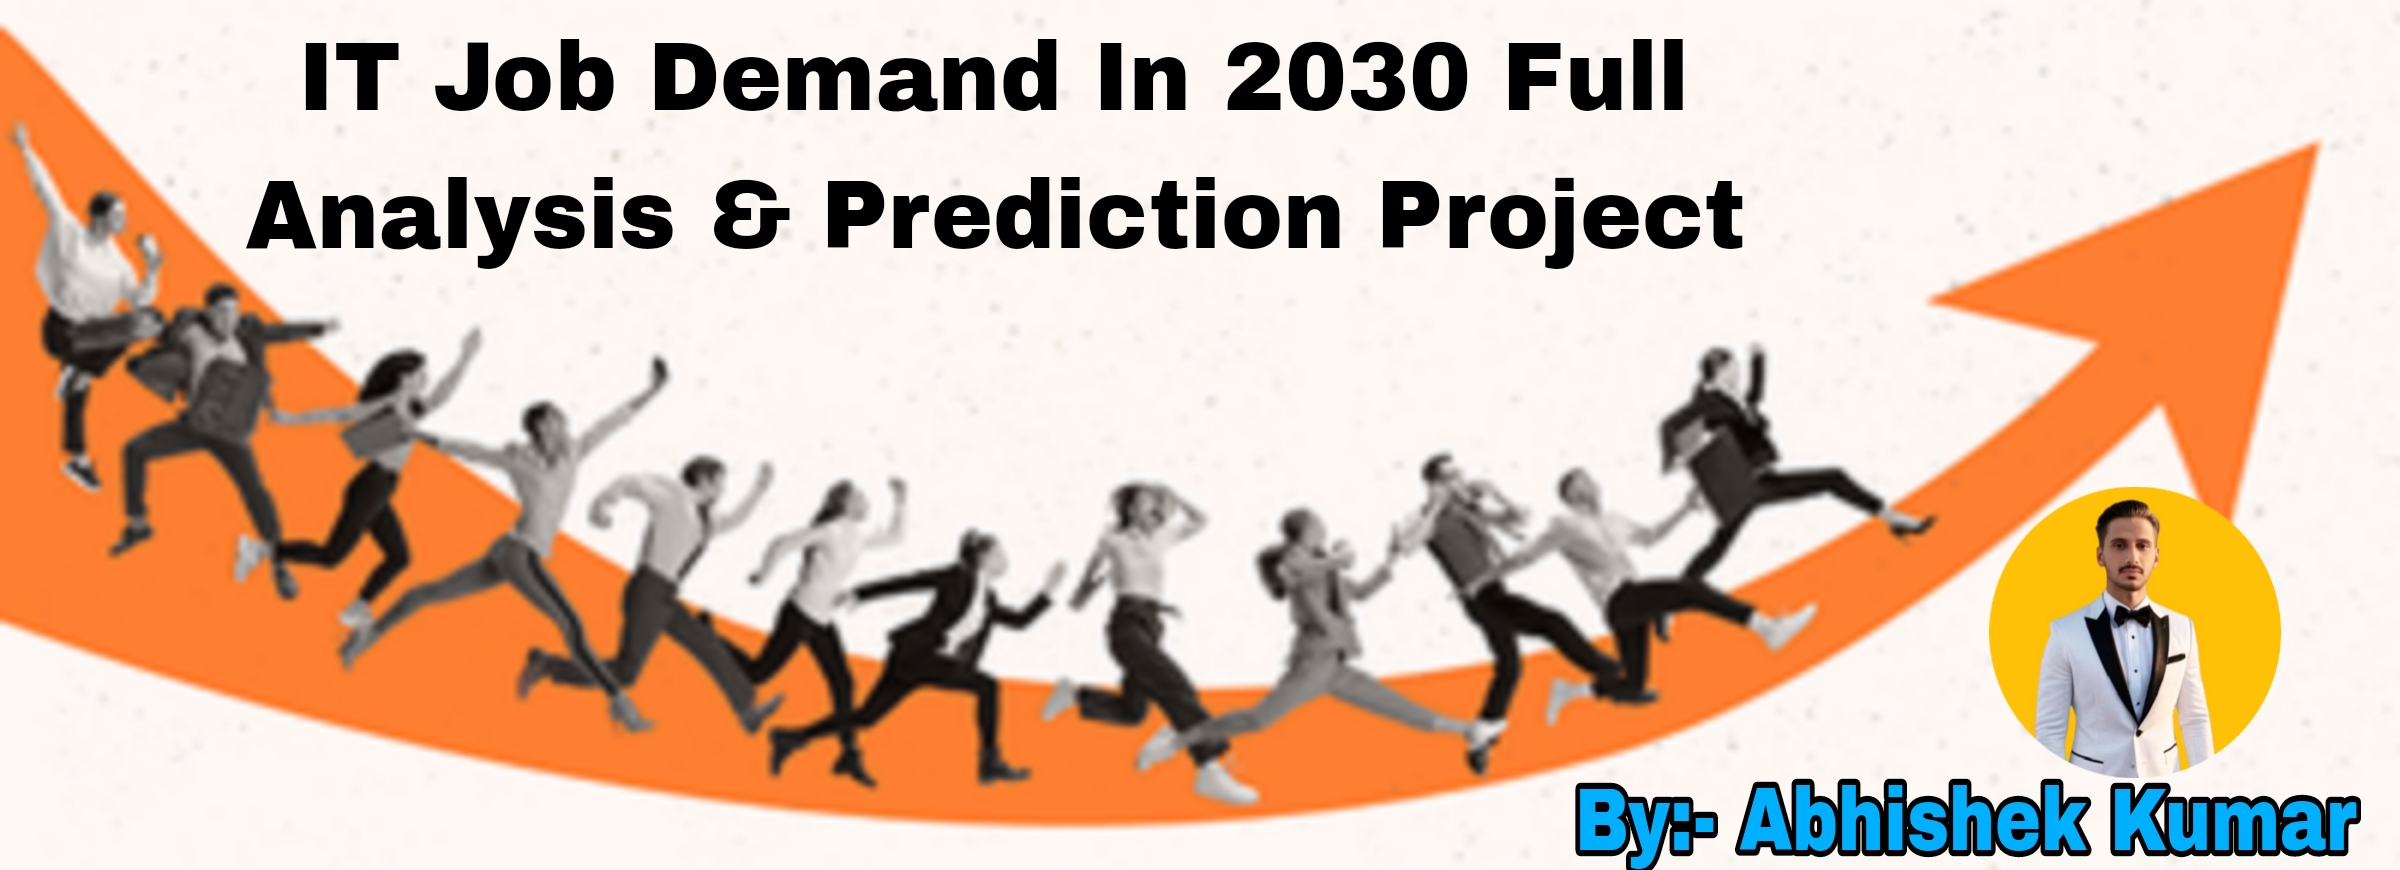

### `Requirement`:----->

In [ ]:
Install Shap
numpy         # Import NumPy for handling numerical operations
pandas        # Import Pandas for data manipulation and analysis
warnings      # Import Warnings to suppress unnecessary warnings
shap          # Import SHAP for interpreting model predictions
matplotlib    # Import matplotlib for data visualization
catboost, CatBoostRegressor  # Import CatBoostRegressor for building a regression model
mean_squared_error    # Import mean_squared_error for evaluating model performance

# Import train_test_split for splitting the data into training and testing sets
from sklearn.model_selection import train_test_split

# Import CountVectorizer from sklearn.feature_extraction.text for text feature extraction
from sklearn.feature_extraction.text import CountVectorizer

# Import ast and re for working with text and regular expressions
import ast
import re


In [2]:
!pip install shap

   ---------------------------------------- 0.0/456.1 kB ? eta -:--:--
   - ------------------------------------- 20.5/456.1 kB 320.0 kB/s eta 0:00:02
   --- ----------------------------------- 41.0/456.1 kB 487.6 kB/s eta 0:00:01
   ------ -------------------------------- 71.7/456.1 kB 491.5 kB/s eta 0:00:01
   ------- ------------------------------- 81.9/456.1 kB 508.4 kB/s eta 0:00:01
   -------- ----------------------------- 102.4/456.1 kB 420.8 kB/s eta 0:00:01
   ---------- --------------------------- 122.9/456.1 kB 450.6 kB/s eta 0:00:01
   ------------ ------------------------- 153.6/456.1 kB 482.7 kB/s eta 0:00:01
   ------------ ------------------------- 153.6/456.1 kB 482.7 kB/s eta 0:00:01
   ------------- ------------------------ 163.8/456.1 kB 426.7 kB/s eta 0:00:01
   --------------- ---------------------- 184.3/456.1 kB 412.5 kB/s eta 0:00:01
   ----------------- -------------------- 204.8/456.1 kB 414.8 kB/s eta 0:00:01
   ----------------- -------------------- 204.8/4

In [5]:
!pip install catboost

In [7]:
# Import necessary libraries
import numpy as np  # Import NumPy for handling numerical operations
import pandas as pd  # Import Pandas for data manipulation and analysis
import warnings  # Import Warnings to suppress unnecessary warnings

# Suppress warning messages
warnings.filterwarnings("ignore")

# Import SHAP for interpreting model predictions
import shap

# Import matplotlib for data visualization
import matplotlib.pyplot as plt

# Import CatBoostRegressor for building a regression model
from catboost import Pool, CatBoostRegressor

# Import mean_squared_error for evaluating model performance
from sklearn.metrics import mean_squared_error

# Import train_test_split for splitting the data into training and testing sets
from sklearn.model_selection import train_test_split

# Import CountVectorizer from sklearn.feature_extraction.text for text feature extraction
from sklearn.feature_extraction.text import CountVectorizer

# Import ast and re for working with text and regular expressions
import ast
import re

# Set Pandas options to display a maximum of 1000 rows
pd.set_option('display.max_rows', 1000)

In [9]:
%%time
# Importing necessary libraries and reading CSV files into pandas DataFrames
df = pd.read_csv('it_jobs_2030.csv')

CPU times: total: 7.89 s
Wall time: 8 s


In [ ]:
item0 = df.shape[0]
df = df.drop_duplicates()
item1 = df.shape[0]
print(f"Removed {item0-item1} full duplicates")
print(df.shape, df.columns)

In [10]:
df=pd.read_csv("it_jobs_2030.csv")

In [11]:
df

,Domain,Job Title,Projected Growth by 2030
0,Augmented Reality (AR),Engineer,77%
1,5G Networks,Developer,70%
2,Cybersecurity,Engineer,36%
3,Internet of Things (IoT),Consultant,138%
4,Cybersecurity,Analyst,86%
...,...,...,...
13606020,Blockchain,Developer,10%
13606021,Robotics,Developer,19%
13606022,Cybersecurity,Engineer,105%
13606023,Cybersecurity,Analyst,44%


In [12]:
df.head()

,Domain,Job Title,Projected Growth by 2030
0,Augmented Reality (AR),Engineer,77%
1,5G Networks,Developer,70%
2,Cybersecurity,Engineer,36%
3,Internet of Things (IoT),Consultant,138%
4,Cybersecurity,Analyst,86%


In [13]:
df.tail()

,Domain,Job Title,Projected Growth by 2030
13606020,Blockchain,Developer,10%
13606021,Robotics,Developer,19%
13606022,Cybersecurity,Engineer,105%
13606023,Cybersecurity,Analyst,44%
13606024,Cybersecurity,Manager,84%


In [15]:
df.info

<bound method DataFrame.info of                             Domain   Job Title Projected Growth by 2030
0           Augmented Reality (AR)    Engineer                      77%
1                      5G Networks   Developer                      70%
2                    Cybersecurity    Engineer                      36%
3         Internet of Things (IoT)  Consultant                     138%
4                    Cybersecurity     Analyst                      86%
...                            ...         ...                      ...
13606020                Blockchain   Developer                      10%
13606021                  Robotics   Developer                      19%
13606022             Cybersecurity    Engineer                     105%
13606023             Cybersecurity     Analyst                      44%
13606024             Cybersecurity     Manager                      84%

[13606025 rows x 3 columns]>

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13606025 entries, 0 to 13606024
Data columns (total 3 columns):
 #   Column                    Dtype 
---  ------                    ----- 
 0   Domain                    object
 1   Job Title                 object
 2   Projected Growth by 2030  object
dtypes: object(3)
memory usage: 311.4+ MB


In [20]:
df.describe()

,Domain,Job Title,Projected Growth by 2030
count,13606025,13606025,13606025
unique,13,6,72
top,Artificial Intelligence,Architect,77%
freq,1047730,2269578,543372


In [21]:
df.describe

<bound method NDFrame.describe of                             Domain   Job Title Projected Growth by 2030
0           Augmented Reality (AR)    Engineer                      77%
1                      5G Networks   Developer                      70%
2                    Cybersecurity    Engineer                      36%
3         Internet of Things (IoT)  Consultant                     138%
4                    Cybersecurity     Analyst                      86%
...                            ...         ...                      ...
13606020                Blockchain   Developer                      10%
13606021                  Robotics   Developer                      19%
13606022             Cybersecurity    Engineer                     105%
13606023             Cybersecurity     Analyst                      44%
13606024             Cybersecurity     Manager                      84%

[13606025 rows x 3 columns]>

In [22]:
df.columns

Index(['Domain', 'Job Title', 'Projected Growth by 2030'], dtype='object')

In [23]:
df.size

40818075

In [24]:
df.shape

(13606025, 3)

In [25]:
df.columns

Index(['Domain', 'Job Title', 'Projected Growth by 2030'], dtype='object')

In [26]:
df.isnull()

,Domain,Job Title,Projected Growth by 2030
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
13606020,False,False,False
13606021,False,False,False
13606022,False,False,False
13606023,False,False,False


In [27]:
df.isnull().sum()

Domain                      0
Job Title                   0
Projected Growth by 2030    0
dtype: int64

In [28]:
df.duplicated().sum()

13600409

In [29]:
%%time
# Importing necessary libraries and reading CSV files into pandas DataFrames
df = pd.read_csv('it_jobs_2030.csv')
item0 = df.shape[0]
df = df.drop_duplicates()
item1 = df.shape[0]
print(f"Removed {item0-item1} full duplicates")
print(df.shape, df.columns)

Removed 13600409 full duplicates
(5616, 3) Index(['Domain', 'Job Title', 'Projected Growth by 2030'], dtype='object')
CPU times: total: 12.6 s
Wall time: 12.6 s


In [30]:
df.sample(5).T

,3689,7409,1721,2620,5042
Domain,Cybersecurity,Virtual Reality (VR),Augmented Reality (AR),Artificial Intelligence,Blockchain
Job Title,Architect,Developer,Architect,Architect,Architect
Projected Growth by 2030,10%,11%,79%,60%,56%


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5616 entries, 0 to 56997
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Domain                    5616 non-null   object
 1   Job Title                 5616 non-null   object
 2   Projected Growth by 2030  5616 non-null   object
dtypes: object(3)
memory usage: 175.5+ KB


### @ Data Transformation:---->

In [37]:
!pip install feature_engine

   ---------------------------------------- 0.0/364.1 kB ? eta -:--:--
   ---------------------------------------- 0.0/364.1 kB ? eta -:--:--
   --- ----------------------------------- 30.7/364.1 kB 660.6 kB/s eta 0:00:01
   --- ----------------------------------- 30.7/364.1 kB 660.6 kB/s eta 0:00:01
   -------- ------------------------------ 81.9/364.1 kB 512.0 kB/s eta 0:00:01
   ----------- -------------------------- 112.6/364.1 kB 598.8 kB/s eta 0:00:01
   ------------ ------------------------- 122.9/364.1 kB 516.7 kB/s eta 0:00:01
   ----------------- -------------------- 163.8/364.1 kB 579.6 kB/s eta 0:00:01
   ------------------ ------------------- 174.1/364.1 kB 553.5 kB/s eta 0:00:01
   --------------------- ---------------- 204.8/364.1 kB 541.9 kB/s eta 0:00:01
   ------------------------- ------------ 245.8/364.1 kB 559.4 kB/s eta 0:00:01
   -------------------------- ----------- 256.0/364.1 kB 583.8 kB/s eta 0:00:01
   ----------------------------- -------- 286.7/364.1 kB 5

  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you have joblib 1.4.2 which is incompatible.
pandas-profiling 3.2.0 requires visions[type_image_path]==0.7.4, but you have visions 0.7.6 which is incompatible.


In [38]:
# Install Python packages using pip.

# The "!pip" command allows you to run shell commands in Jupyter Notebook or Colab cells.
# It is used here to install Python packages.
# The "-q" flag stands for "quiet," which means it will suppress output during installation.
# "feature_engine," are the packages being installed.
# The "2>/dev/null" part redirects any error messages (stderr) to the null device, effectively silencing them.
# This is often used when you want to hide installation messages.
!pip install -q feature_engine 2>/dev/null

The system cannot find the path specified.


In [40]:
# Import RareLabelEncoder from feature_engine.encoding for encoding categorical features
from feature_engine.encoding import RareLabelEncoder

In [41]:
# select label
main_label = 'growth_2030_percentage'
def extract_label(x):
    try:
        return float(x.rstrip('%'))
    except:
        return None
df[main_label] = df['Projected Growth by 2030'].apply(extract_label)
df = df.drop(['Projected Growth by 2030'], axis=1)

# drop values with null label
df = df[~df[main_label].isnull()]

# set up the rare label encoder limiting number of categories to max_n_categories
for col in ['Domain', 'Job Title']:
    print(f"Label encoding columns {col}")
    df[col] = df[col].fillna('Other')
    encoder = RareLabelEncoder(n_categories=1, max_n_categories=100, replace_with='Other', tol=20/df.shape[0])
    df[col] = encoder.fit_transform(df[[col]])

print(df.shape)
df.sample(5).T

Label encoding columns Domain
Label encoding columns Job Title
(5616, 3)


,17649,5635,2960,22865,8672
Domain,Internet of Things (IoT),Artificial Intelligence,Edge Computing,Augmented Reality (AR),5G Networks
Job Title,Analyst,Consultant,Developer,Analyst,Manager
growth_2030_percentage,93.0,76.0,86.0,138.0,56.0


### @ Machine Learning:---->

In [42]:
# Initialize Data:---->
y=df[main_label].values.reshape(-1,)
X=df.drop([main_label], axis=1) # Drop extra labels
cat_cols = X.select_dtypes(include=['object']).columns
print(cat_cols)
cat_cols_idx = [list(X.columns).index(c) for c in cat_cols]
X_train,X_test, y_train,y_test = train_test_split(X, y, test_size=0.5, random_state=83, stratify=df[['Domain']])
X_train.shape, X_test.shape, y_train.shape, y_test.shape

Index(['Domain', 'Job Title'], dtype='object')


((2808, 2), (2808, 2), (2808,), (2808,))

In [44]:
# initialize Pool
train_pool = Pool(X_train, 
                  y_train, 
                  cat_features=cat_cols_idx)
test_pool = Pool(X_test,
                 y_test,
                 cat_features=cat_cols_idx)
# specify the training parameters 
model = CatBoostRegressor(iterations=2000,
                          depth=4, 
                          learning_rate=0.01,
                          verbose=0,
                          early_stopping_rounds=300,
                          loss_function='RMSE')
#train the model
model.fit(train_pool, eval_set=test_pool)
# make the prediction using the resulting model
y_train_pred = model.predict(train_pool)
y_test_pred = model.predict(test_pool)

rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
print(f"RMSE score for train {round(rmse_train,2)} percentage points, and for test {round(rmse_test,2)} percentage points")

RMSE score for train 40.61 percentage points, and for test 40.97 percentage points


In [45]:
# Baseline scores (assuming the same prediction for all data samples)
rmse_bs_train = mean_squared_error(y_train, [np.mean(y_train)]*len(y_train), squared=False)
rmse_bs_test = mean_squared_error(y_test, [np.mean(y_train)]*len(y_test), squared=False)
print(f"RMSE baseline score for train {round(rmse_bs_train,2)} percentage points, and for test {round(rmse_bs_test,2)} percentage points")

RMSE baseline score for train 40.39 percentage points, and for test 41.08 percentage points


### @Explanation With Shap value:---

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline

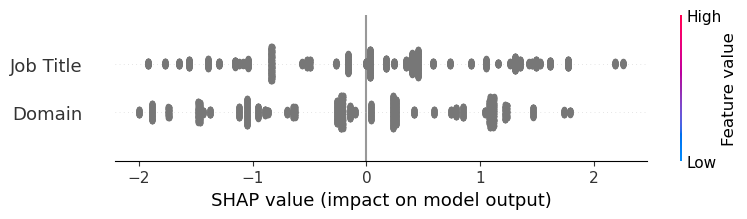

In [48]:
shap.initjs()
ex=shap.TreeExplainer(model)
shap_values = ex.shap_values(X_test)
shap.summary_plot(shap_values, X_test, max_display=30)

In [50]:
expected_values =ex.expected_value
print(f"Average expected label is {round(expected_values,2)} percentage points")
print(f"Average actual label is {round(np.mean(y_test),2)} percentage points")

Average expected label is 80.37 percentage points
Average actual label is 80.35 percentage points



Domain



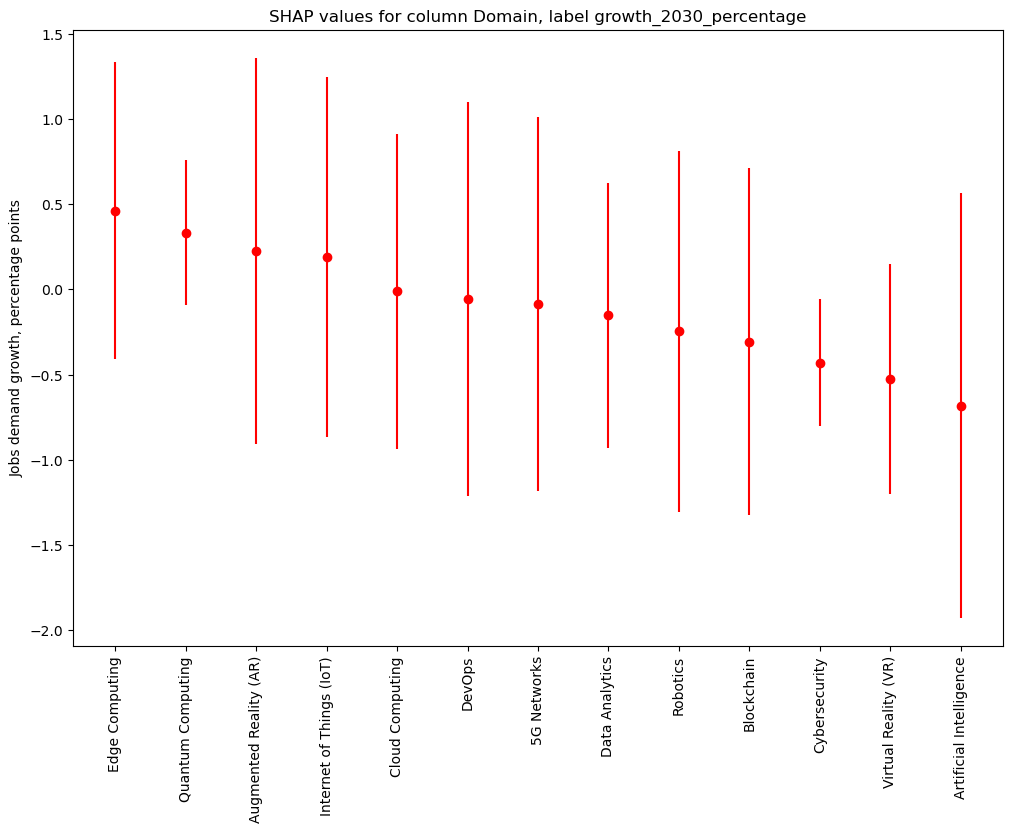

                            gain  gain_std  count
col                                              
Edge Computing            0.4625    0.8693    216
Quantum Computing         0.3338    0.4254    216
Augmented Reality (AR)    0.2259    1.1323    216
Internet of Things (IoT)  0.1914    1.0557    216
Cloud Computing          -0.0111    0.9251    216
DevOps                   -0.0542    1.1558    216
5G Networks              -0.0855    1.0956    216
Data Analytics           -0.1515    0.7761    216
Robotics                 -0.2454    1.0602    216
Blockchain               -0.3067    1.0197    216
Cybersecurity            -0.4294    0.3704    216
Virtual Reality (VR)     -0.5259    0.6732    216
Artificial Intelligence  -0.6818    1.2454    216

Job Title



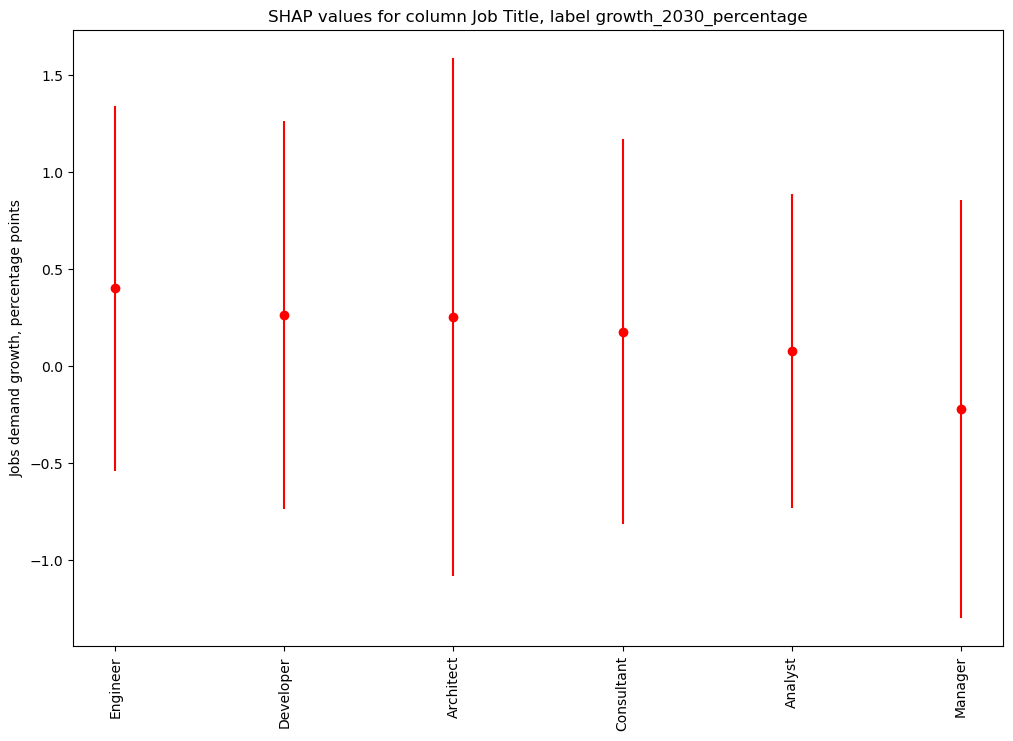

              gain  gain_std  count
col                                
Engineer    0.4004    0.9396    471
Developer   0.2628    0.9977    464
Architect   0.2536    1.3324    452
Consultant  0.1775    0.9911    466
Analyst     0.0763    0.8092    474
Manager    -0.2204    1.0780    481


In [51]:
def show_shap(col, shap_values=shap_values, label=main_label, X_test=X_test):
    df_infl = X_test.copy()
    df_infl['shap_'] = shap_values[:,df_infl.columns.tolist().index(col)]
    gain = round(df_infl.groupby(col)['shap_'].mean(),4)
    gain_std = round(df_infl.groupby(col)['shap_'].std(),4)
    cnt = df_infl.groupby(col)['shap_'].count()
    dd_dict = {'col': list(gain.index), 'gain': list(gain.values), 'gain_std': list(gain_std.values), 'count': cnt}
    df_res = pd.DataFrame.from_dict(dd_dict).sort_values('gain', ascending=False).set_index('col')
    plt.figure(figsize=(12,8))
    plt.errorbar(df_res.index, df_res['gain'], yerr=df_res['gain_std'], fmt="o", color="r")
    plt.title(f'SHAP values for column {col}, label {label}')
    plt.ylabel('Jobs demand growth, percentage points')
    plt.tick_params(axis="x", rotation=90)
    plt.show();
    print(df_res)
    return

for col in X_test.columns:
    print()
    print(col)
    print()
    show_shap(col, shap_values, label=main_label, X_test=X_test)

Conclusion of this Project:---> These are the Top 6 Job Profile that are Demand in Future IT Sector:------
#### ----->  Data Scientists 
#### ----->  Data Engineer    0.4004    0.9396    471
#### ----->  Developer   0.2628    0.9977    464
#### ----->  Consultant  0.1775    0.9911    466
#### ----->  Analyst     0.0763    0.8092    474
#### ----->  Manager    -0.2204    1.0780    481

## Thank you Connection

# Abhishek Kumar